## Report


##### Import the libraries
+ import numpy as np 
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import seaborn as sns
+ import tensorflow
+ from tensorflow import keras
+ from keras.models import  Sequential
+ from keras.layers import Dense, Dropout
+ from sklearn.preprocessing import StandardScaler
+ from sklearn.metrics import accuracy_score
+ from mlxtend.plotting import plot_decision_regions


#### Loading the dataset
+ Check the dataset
+ Check the info of data


#### Check the  spead of datapoint using vizualization

#### Performing train test split and Building MLP
+ Identify the Input and Output
+ Segregate the data into train and test part
+ perform preprocessing step
+ perform fit transform on train data and transform on test data


#### Important Steps in MLP
##### Create the Architecture using Sequencial
+ Crete the model 
+ specify the no of nurons and activation function like relu, sigmoid and tanh
+ Specify the kernel_initializer = random_uniform, he_uniform, he_normal, Xavier, Glorot  
+ Specify the input dimension

##### Model Compilation 
+ Specify the Optimizer like gd, sgd, mini batch sgd
+ loss function:
  + For Regression: MSE, MAE, Huber loss
  + For Classification: Binary cross entropy, Categorical cross entropy
+ Specify Metrics as accuracy

##### Training the model
+ fit the X_train_trans and y_train in the model means leaning the patterns, relationship between input and output
+ Specify the batch size
+ specify the epochs and validation_split

##### MLP Evaluation and Plotting decision surfaces
+ check the prediction of X_test_trans
+ check the accuracy score
+ Try to compair the loss and val_loss using vizualization so can understand the underfitting and overfitting
+ plot the decision surface of X_train_trans, y_train
+ plot the decision surface of X_test_trans, y_test

Importing Requisite Libraries

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [36]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [70]:
df = pd.read_csv(r"E:\Excel_files\Deep Learning\demo_data\7.xor.csv", header = None)

In [71]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


Plotting the datapoints to identify shape

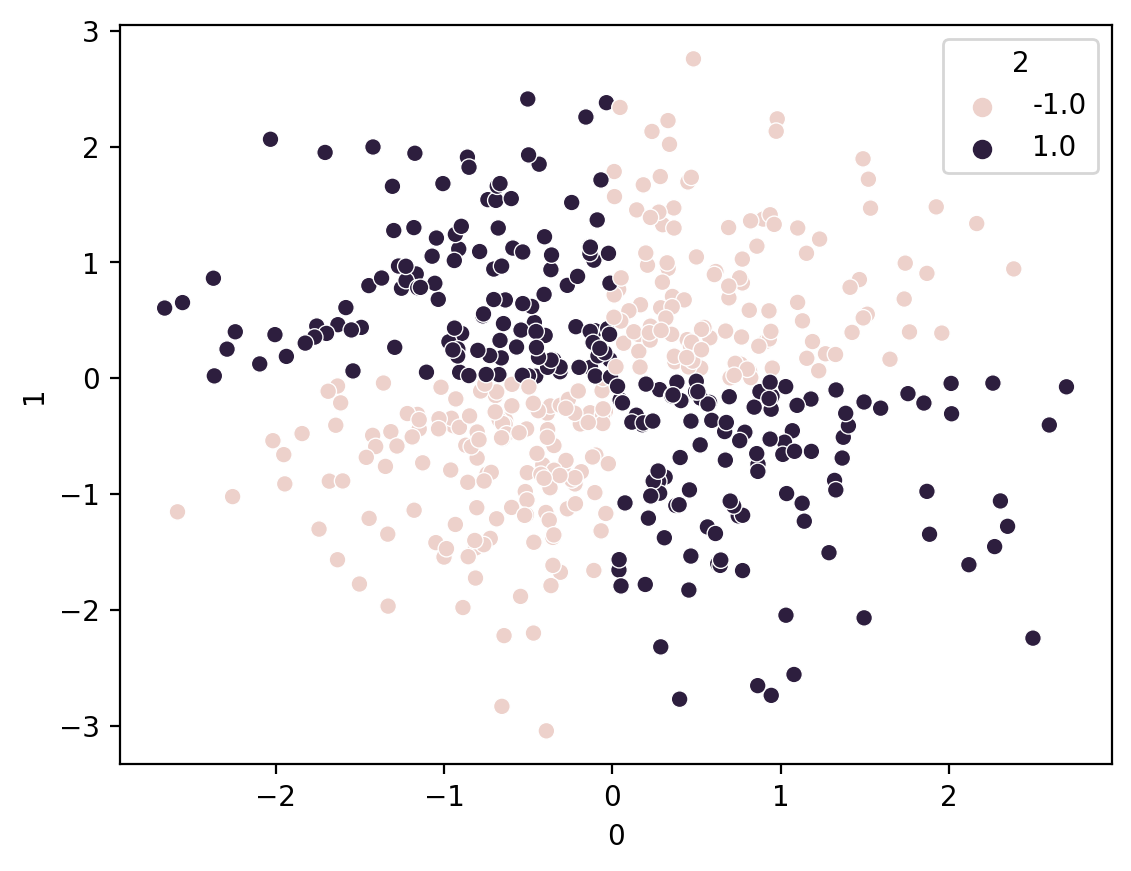

In [73]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [74]:
X = df[[0,1]]
y = df[2]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trans=sc.fit_transform(X_train)

In [77]:
X_test_trans = sc.transform(X_test)

In [105]:
model = Sequential()
model.add(Dense(12,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons
model.add(Dense(10,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(6,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [106]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 12)                36        
                                                                 
 dense_35 (Dense)            (None, 10)                130       
                                                                 
 dense_36 (Dense)            (None, 8)                 88        
                                                                 
 dense_37 (Dense)            (None, 6)                 54        
                                                                 
 dense_38 (Dense)            (None, 4)                 28        
                                                                 
 dense_39 (Dense)            (None, 3)                 15        
                                                                 
 dense_40 (Dense)            (None, 2)                

Model Compilation and Training

In [107]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [108]:
history = model.fit(X_train_trans,y_train,epochs = 80 ,validation_split = 0.2 )

Epoch 1/80
10/10 [==============================] - 5s 104ms/step - loss: 0.6848 - accuracy: 0.0000e+00 - val_loss: 0.6720 - val_accuracy: 0.0000e+00
Epoch 2/80
10/10 [==============================] - 0s 19ms/step - loss: 0.6638 - accuracy: 0.0000e+00 - val_loss: 0.6482 - val_accuracy: 0.0000e+00
Epoch 3/80
10/10 [==============================] - 0s 19ms/step - loss: 0.6416 - accuracy: 0.0000e+00 - val_loss: 0.6236 - val_accuracy: 0.0000e+00
Epoch 4/80
10/10 [==============================] - 0s 18ms/step - loss: 0.6189 - accuracy: 0.0000e+00 - val_loss: 0.5955 - val_accuracy: 0.0000e+00
Epoch 5/80
10/10 [==============================] - 0s 16ms/step - loss: 0.5919 - accuracy: 0.0000e+00 - val_loss: 0.5684 - val_accuracy: 0.0000e+00
Epoch 6/80
10/10 [==============================] - 0s 22ms/step - loss: 0.5657 - accuracy: 0.0000e+00 - val_loss: 0.5350 - val_accuracy: 0.0000e+00
Epoch 7/80
10/10 [==============================] - 0s 34ms/step - loss: 0.5314 - accuracy: 0.0000e+00 - 

MLP Evaluation and Plotting decision surfaces

In [85]:
Y_cap = model.predict(X_test_trans)

4/4 [==============================] - 0s 5ms/step


In [86]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [87]:
Y_cap_f

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.5

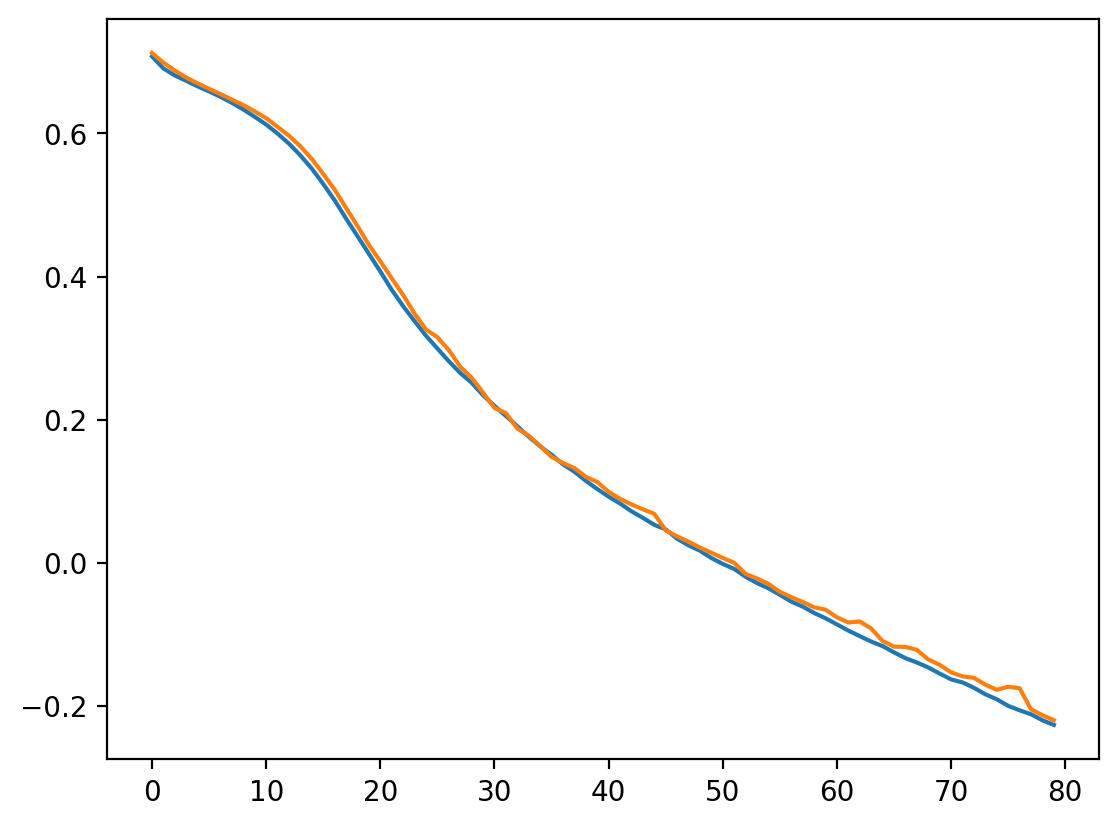

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [90]:
# !pip install mlxtend --upgrade

In [91]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 33s 3ms/step


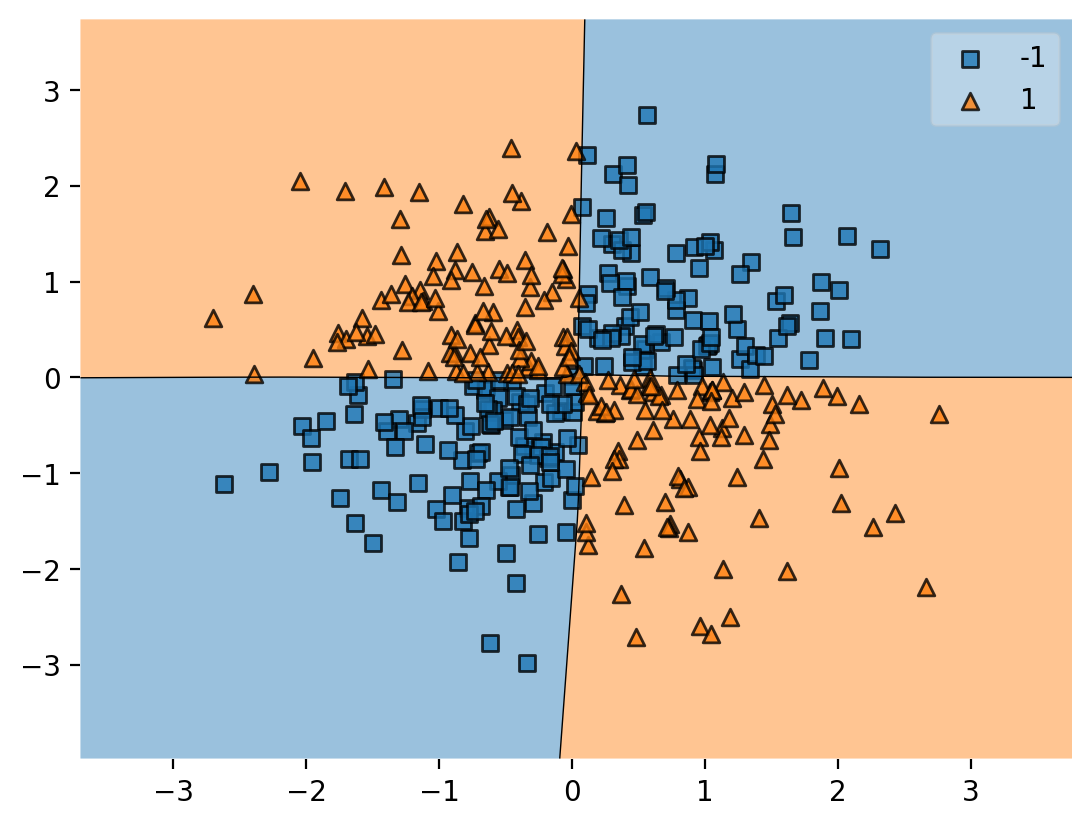

In [92]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 32s 3ms/step


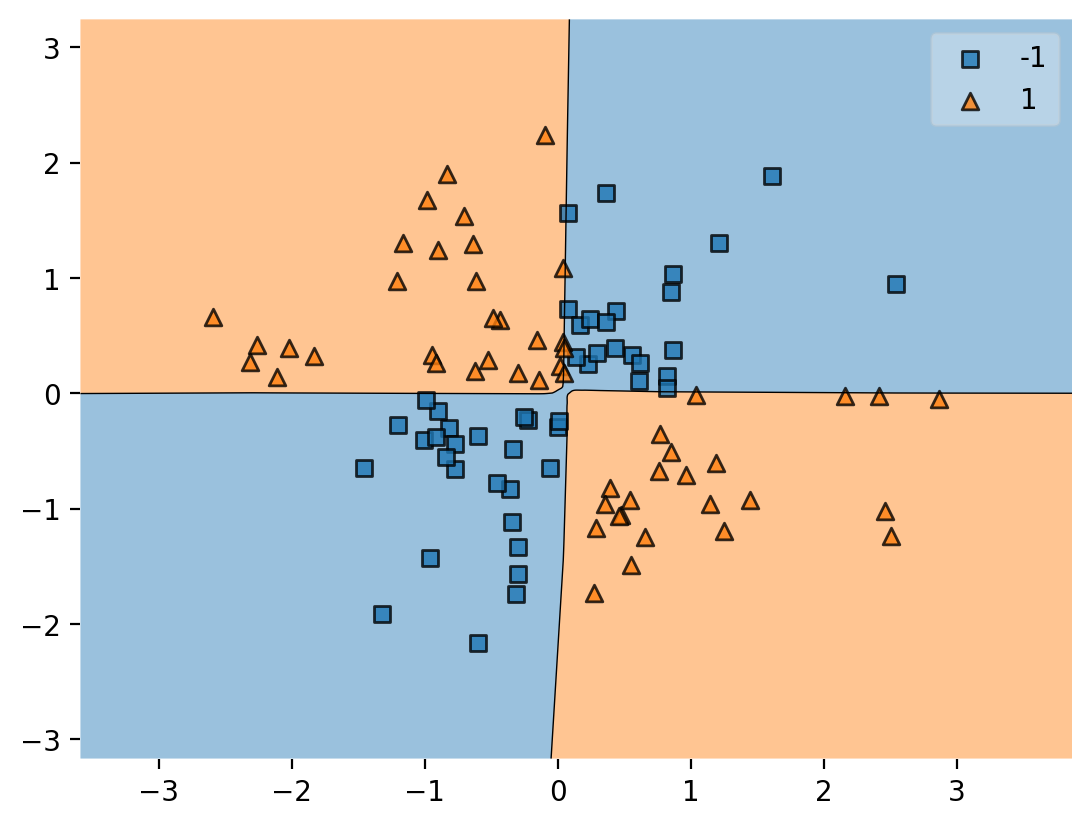

In [93]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

In [154]:
model = Sequential()
model.add(Dense(4,activation = 'tanh',kernel_initializer = 'random_uniform',input_dim = 2)) 
model.add(Dense(2,activation = 'tanh'))
model.add(Dense(1,activation = 'sigmoid'))

In [155]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 4)                 12        
                                                                 
 dense_58 (Dense)            (None, 2)                 10        
                                                                 
 dense_59 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_trans, y_train, epochs = 430 ,validation_split = 0.2)

Epoch 1/430
10/10 [==============================] - 2s 49ms/step - loss: 0.6835 - accuracy: 0.1312 - val_loss: 0.6781 - val_accuracy: 0.0125
Epoch 2/430
10/10 [==============================] - 0s 16ms/step - loss: 0.6649 - accuracy: 0.0125 - val_loss: 0.6585 - val_accuracy: 0.0000e+00
Epoch 3/430
10/10 [==============================] - 0s 16ms/step - loss: 0.6444 - accuracy: 0.0000e+00 - val_loss: 0.6386 - val_accuracy: 0.0000e+00
Epoch 4/430
10/10 [==============================] - 0s 16ms/step - loss: 0.6222 - accuracy: 0.0000e+00 - val_loss: 0.6181 - val_accuracy: 0.0000e+00
Epoch 5/430
10/10 [==============================] - 0s 16ms/step - loss: 0.6016 - accuracy: 0.0000e+00 - val_loss: 0.5949 - val_accuracy: 0.0000e+00
Epoch 6/430
10/10 [==============================] - 0s 16ms/step - loss: 0.5763 - accuracy: 0.0000e+00 - val_loss: 0.5724 - val_accuracy: 0.0000e+00
Epoch 7/430
10/10 [==============================] - 0s 13ms/step - loss: 0.5522 - accuracy: 0.0000e+00 - val_lo

10/10 [==============================] - 0s 16ms/step - loss: -0.3399 - accuracy: 0.0719 - val_loss: -0.2213 - val_accuracy: 0.0500
Epoch 57/430
10/10 [==============================] - 0s 13ms/step - loss: -0.3501 - accuracy: 0.0750 - val_loss: -0.2298 - val_accuracy: 0.0625
Epoch 58/430
10/10 [==============================] - 0s 14ms/step - loss: -0.3596 - accuracy: 0.0781 - val_loss: -0.2380 - val_accuracy: 0.0625
Epoch 59/430
10/10 [==============================] - 0s 13ms/step - loss: -0.3694 - accuracy: 0.0812 - val_loss: -0.2460 - val_accuracy: 0.0625
Epoch 60/430
10/10 [==============================] - 0s 15ms/step - loss: -0.3788 - accuracy: 0.0844 - val_loss: -0.2540 - val_accuracy: 0.0625
Epoch 61/430
10/10 [==============================] - 0s 13ms/step - loss: -0.3882 - accuracy: 0.0844 - val_loss: -0.2608 - val_accuracy: 0.0625
Epoch 62/430
10/10 [==============================] - 0s 15ms/step - loss: -0.3972 - accuracy: 0.0906 - val_loss: -0.2673 - val_accuracy: 0.062

10/10 [==============================] - 0s 9ms/step - loss: -0.9347 - accuracy: 0.1094 - val_loss: -0.6717 - val_accuracy: 0.1000
Epoch 169/430
10/10 [==============================] - 0s 10ms/step - loss: -0.9377 - accuracy: 0.1094 - val_loss: -0.6764 - val_accuracy: 0.1000
Epoch 170/430
10/10 [==============================] - 0s 9ms/step - loss: -0.9427 - accuracy: 0.1094 - val_loss: -0.6752 - val_accuracy: 0.1000
Epoch 171/430
10/10 [==============================] - 0s 9ms/step - loss: -0.9462 - accuracy: 0.1094 - val_loss: -0.6816 - val_accuracy: 0.1000
Epoch 172/430
10/10 [==============================] - 0s 9ms/step - loss: -0.9507 - accuracy: 0.1094 - val_loss: -0.6821 - val_accuracy: 0.1000
Epoch 173/430
10/10 [==============================] - 0s 10ms/step - loss: -0.9551 - accuracy: 0.1094 - val_loss: -0.6854 - val_accuracy: 0.1000
Epoch 174/430
10/10 [==============================] - 0s 10ms/step - loss: -0.9585 - accuracy: 0.1094 - val_loss: -0.6863 - val_accuracy: 0.1

10/10 [==============================] - 0s 15ms/step - loss: -1.4290 - accuracy: 0.1031 - val_loss: -0.9889 - val_accuracy: 0.1000
Epoch 281/430
10/10 [==============================] - 0s 15ms/step - loss: -1.4317 - accuracy: 0.1031 - val_loss: -0.9906 - val_accuracy: 0.1000
Epoch 282/430
10/10 [==============================] - 0s 11ms/step - loss: -1.4379 - accuracy: 0.1031 - val_loss: -0.9948 - val_accuracy: 0.1000
Epoch 283/430
10/10 [==============================] - 0s 12ms/step - loss: -1.4413 - accuracy: 0.1031 - val_loss: -0.9980 - val_accuracy: 0.1000
Epoch 284/430
10/10 [==============================] - 0s 10ms/step - loss: -1.4464 - accuracy: 0.1031 - val_loss: -1.0015 - val_accuracy: 0.1000
Epoch 285/430
10/10 [==============================] - 0s 10ms/step - loss: -1.4506 - accuracy: 0.1031 - val_loss: -1.0054 - val_accuracy: 0.1000
Epoch 286/430
10/10 [==============================] - 0s 9ms/step - loss: -1.4552 - accuracy: 0.1031 - val_loss: -1.0089 - val_accuracy: 

In [143]:
train = model.predict(X_train_trans)

13/13 [==============================] - 0s 5ms/step


In [144]:
X_cap_f = np.where(X_cap>0.5,1,0)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,X_cap_f)

0.225

In [146]:
Y_cap = model.predict(X_test_trans)

4/4 [==============================] - 0s 5ms/step


In [147]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.0

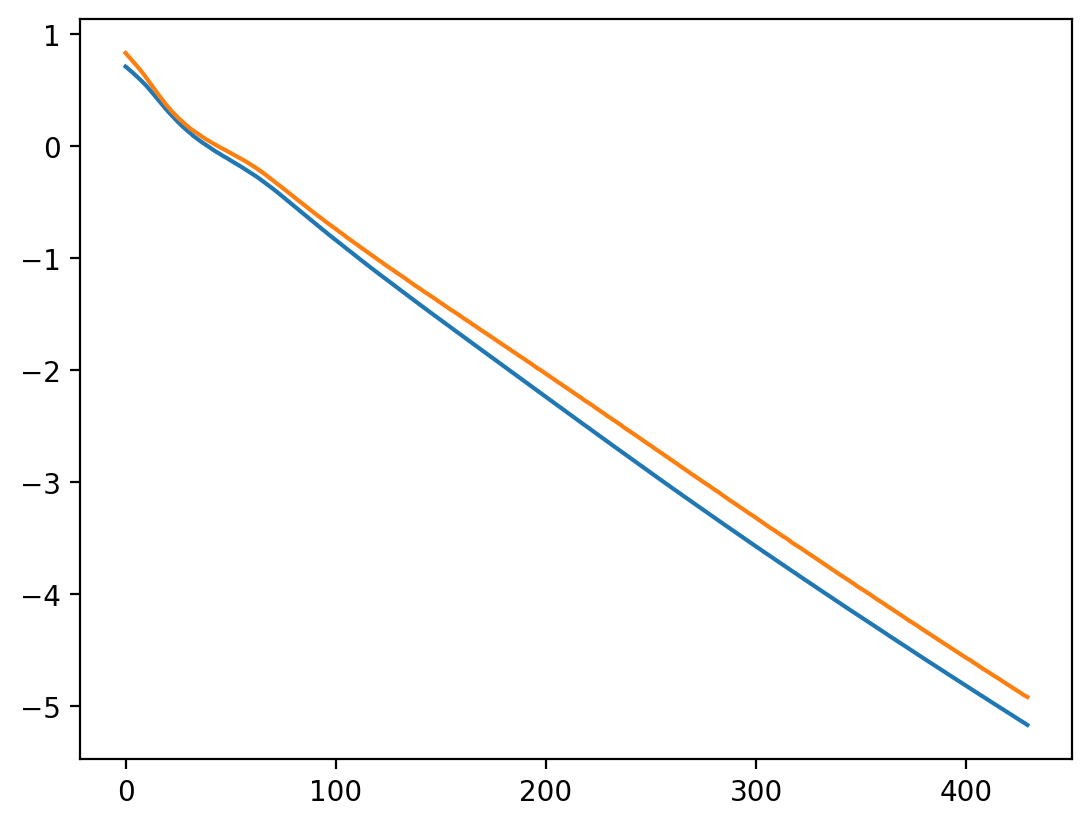

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [150]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 32s 3ms/step


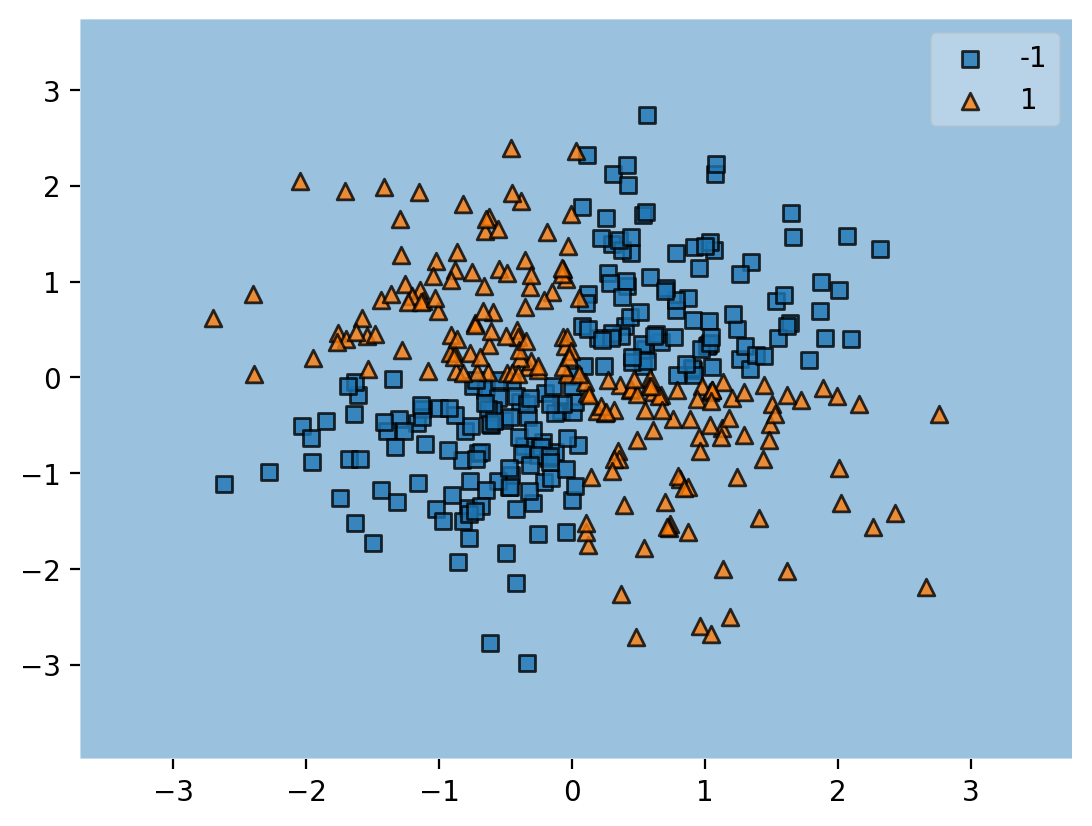

In [152]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 36s 4ms/step


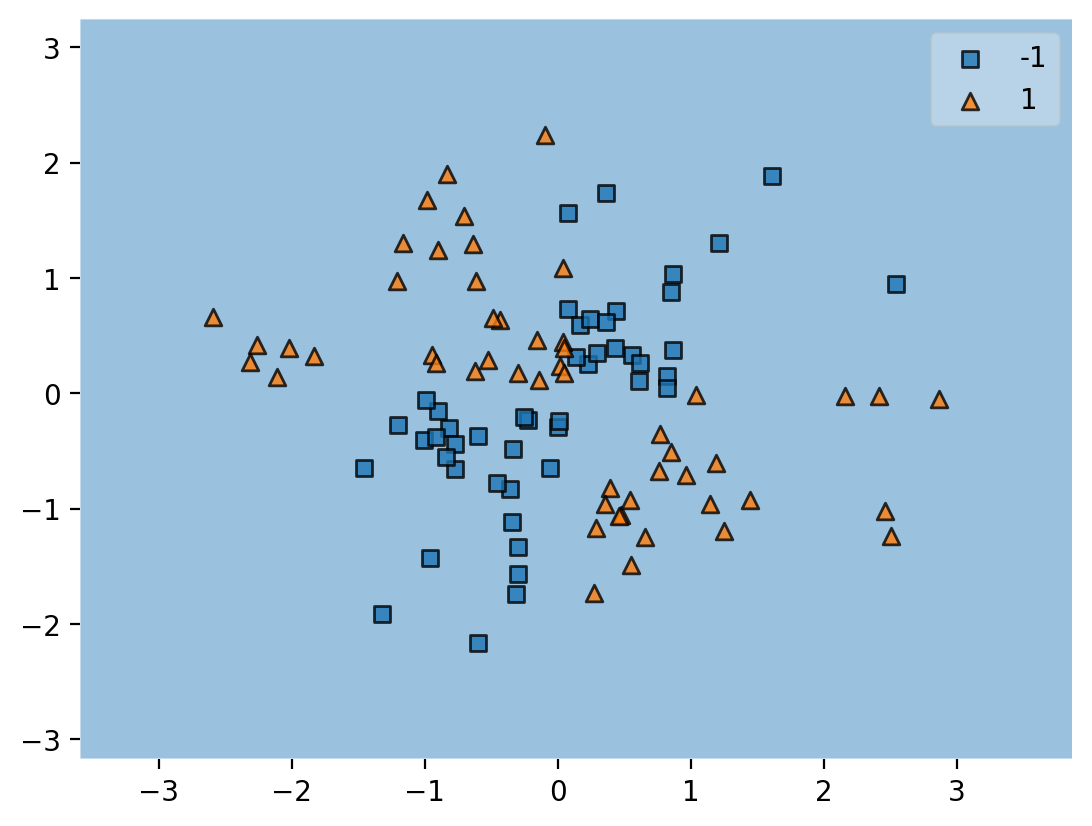

In [138]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);